In [3]:
%run FUNCIONES_GENERALES.ipynb

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# skforecast
import skforecast
import pandas as pd
from sklearn import metrics
from skforecast.datasets import fetch_dataset
from skforecast.plot import set_dark_theme
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from pmdarima import auto_arima 

import warnings
warnings.filterwarnings('once')

In [5]:
columna='Valor'

In [6]:
def prediccion_autorregresivos(datos,datos_train,datos_test, columna):
    
    # Grid search
    forecaster = ForecasterSarimax(
                    regressor=Sarimax(
                                    order=(1, 1, 1), # Placeholder replaced in the grid search
                                    maxiter=500
                                )
                )

    param_grid = {
        'order': [(0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1), (2, 1, 1), (1 ,1 ,2), ( 2, 1, 2),(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1), (2, 0, 1), (1 ,0 ,2), ( 2, 0, 2) ],
        'seasonal_order': [(0, 0, 0, 0), (0, 1, 0, 12), (1, 1, 1, 12)],
        'trend': [None]
    }

    resultados_grid = grid_search_sarimax(
                            forecaster            = forecaster,
                            y                     = datos[columna],
                            param_grid            = param_grid,
                            steps                 = 12,
                            refit                 = True,
                            metric                = 'mean_absolute_error',
                            initial_train_size    = len(datos_train),
                            fixed_train_size      = False,
                            return_best           = False,
                            n_jobs                = 'auto',
                            suppress_warnings_fit = True,
                            verbose               = False,
                            show_progress         = True
                    )
    r=resultados_grid.index[0]
    

    # Predicciones de backtesting con el mejor modelo según el grid search
    # ==============================================================================
    forecaster_1 = ForecasterSarimax( regressor=Sarimax(order=resultados_grid.order[r], seasonal_order=resultados_grid.seasonal_order[r], maxiter=500),
                    )

    metrica_m1, predicciones_m1 = backtesting_sarimax(
                                            forecaster            = forecaster_1,
                                            y                     = datos[columna],
                                            initial_train_size    = len(datos_train),
                                            steps                 = 72,
                                            metric                = 'mean_absolute_error',
                                            refit                 = True,
                                            n_jobs                = "auto",
                                            suppress_warnings_fit = True,
                                            verbose               = False,
                                            show_progress         = True
                                        )

    
    # Comparación de métricas
    # ==============================================================================
    print("Metrica (mean absolute error): ")
    print(metrics.mean_squared_error(datos_test, predicciones_m1[:len(datos_test)]))

    fig, ax = plt.subplots(figsize=(6, 3))
    datos_test.plot(ax=ax, label='test')
    predicciones_m1 = predicciones_m1.rename(columns={'pred': 'grid search'})
    predicciones_m1.plot(ax=ax)
    ax.set_title('Predicciones de backtesting con un modelo SARIMA')
    ax.legend()
    
 

In [133]:
# Parámetros de los modelos:
paramsD1=[1,[350,23]]
paramsD2=[2,[20,0.6,200]]
params_ARMA1 = [250,0.6,3, [0.12,0.24],[0.3],[]]
params_ARMA2 = [270,1.5,0, [0.8],[0.3,0.25],[]]
params_per1= [1,1,[200,10],12]
params_per2= [2,1,[250,13],3]
params_tend1 = [[200,0.3],1,0.3]
params_tend2 = [[150,-4,0.2],2,0.15]

In [7]:
fecha1='1/1/2012'

In [8]:
fecha2='1/1/2024'

In [9]:
fecha3='1/1/2026'

In [122]:
# División en train y test:
df1_train = df_csv('Datos/Determinista','Lineal-det-fin-train')
df1_test = df_csv('Datos/Determinista','Lineal-det-fin-test')
df1=pd.concat([df1_train,df1_test])
df1.index.freq='ME'

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
0.003053033080658961


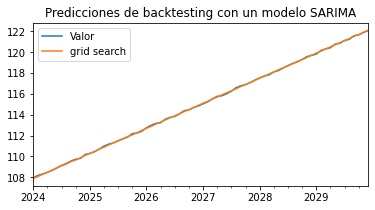

In [140]:
prediccion_autorregresivos(df1,df1_train,df1_test,columna)

In [142]:
# División en train y test:
df2_train = df_csv('Datos/Determinista','Pol-det-periodos-train')
df2_test = df_csv('Datos/Determinista','Pol-det-periodos-test')
df2=pd.concat([df2_train,df2_test])
df2.index.freq='ME'

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
3.109241623298894e+17


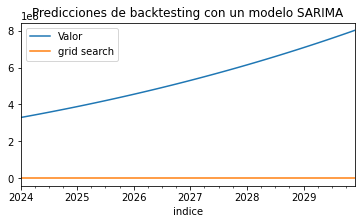

In [144]:
prediccion_autorregresivos(df2,df2_train,df2_test,columna)

In [147]:
# División en train y test:
df3_train = df_csv('Datos/Determinista','Exp-det-fin-train')
df3_test = df_csv('Datos/Determinista','Exp-det-fin-test')
df3=pd.concat([df3_train,df3_test])
df3.index.freq='ME'

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
4.5316726639703765e-63


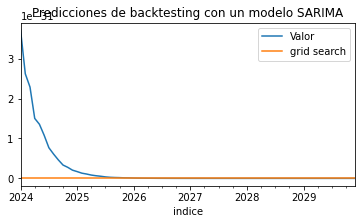

In [148]:
prediccion_autorregresivos(df3,df3_train,df3_test,columna)

In [151]:
# División en train y test:
df4_train = df_csv('Datos/Determinista','Log-det-periodos-train')
df4_test = df_csv('Datos/Determinista','Log-det-periodos-test')
df4=pd.concat([df4_train,df4_test])
df4.index.freq='ME'

prediccion_autorregresivos(df4,df4_train,df4_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

LinAlgError: LU decomposition error.

MODELOS CON DISTRIBUCIONES

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
22.61214909367504


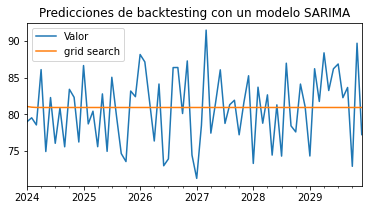

In [153]:
# División en train y test:
df5 = df_csv('Datos/Distribuciones','Normal-fin')
df5_train = df5[:288]
df5_test = df5[288:]
df5.index.freq='ME'

prediccion_autorregresivos(df5,df5_train,df5_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
6.594518424661427


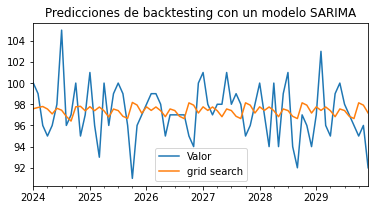

In [8]:
# División en train y test:
df6 = df_csv('Datos/Distribuciones','Binomial-periodos')
df6_train = df6[:288]
df6_test = df6[288:]
df6.index.freq='M'

prediccion_autorregresivos(df6,df6_train,df6_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
8.68653934325407


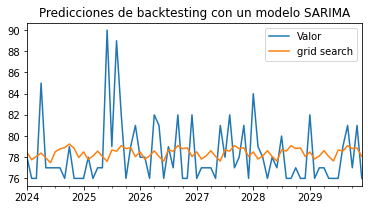

In [9]:
# División en train y test:
df7 = df_csv('Datos/Distribuciones','Geometrica-fin')
df7_train = df7[:288]
df7_test = df7[288:]
df7.index.freq='M'

prediccion_autorregresivos(df7,df7_train,df7_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
6.8619987631261


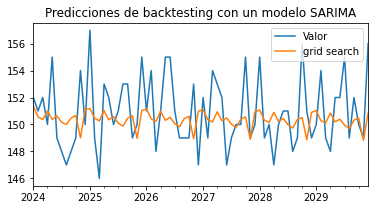

In [10]:
# División en train y test:
dfg = df_csv('Datos/Distribuciones','Poisson-periodos')
dfg_train = dfg[:288]
dfg_test = dfg[288:]
dfg.index.freq='M'

prediccion_autorregresivos(dfg,dfg_train,dfg_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
3.443735468702812


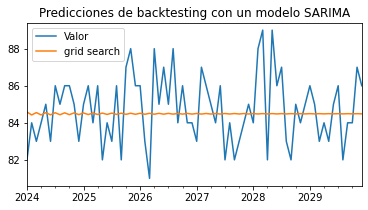

In [158]:
# Dividimos en train y test
df8 = df_csv('Datos/Distribuciones','Hipergeometrica-fin')
df8_train = df8[:288]
df8_test = df8[288:]
df8.index.freq='ME'

prediccion_autorregresivos(df8,df8_train,df8_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
0.07264043648386556


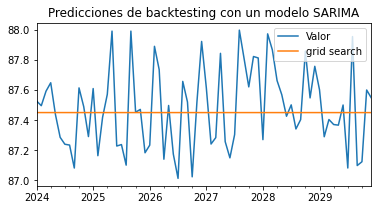

In [162]:
df9 = df_csv('Datos/Distribuciones','Uniforme-periodos')
df9_train = df9[:288]
df9_test = df9[288:]
df9.index.freq='ME'

prediccion_autorregresivos(df9,df9_train,df9_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
0.0


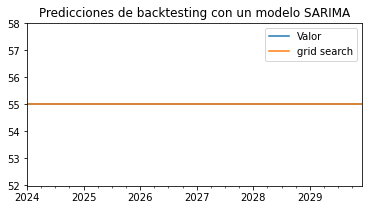

In [163]:
# División en train y test:
df10 = df_csv('Datos/Distribuciones','Constante-fin')
df10_train = df10[:288]
df10_test = df10[288:]
df10.index.freq='ME'

prediccion_autorregresivos(df10,df10_train,df10_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
7.061759582238218


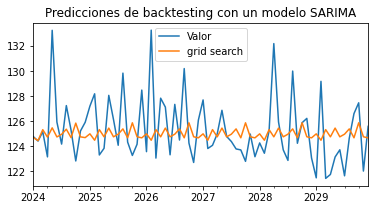

In [164]:
# División en train y test:
df11 = df_csv('Datos/Distribuciones','Gamma-periodos')
df11_train = df11[:288]
df11_test = df11[288:]
df11.index.freq='ME'

prediccion_autorregresivos(df11,df11_train,df11_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
1.6588555405253578


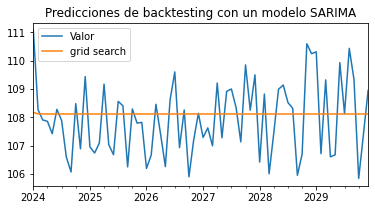

In [165]:
# División en train y test:
df12 = df_csv('Datos/Distribuciones','Beta-fin')
df12_train = df12[:288]
df12_test = df12[288:]
df12.index.freq='ME'

prediccion_autorregresivos(df12,df12_train,df12_test,columna)

Number of models compared: 42.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7fc3666ed040>


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
1.169748614681108


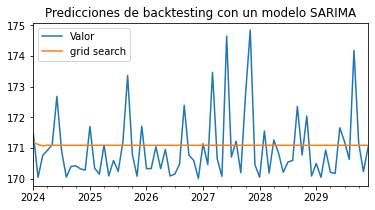

In [166]:
# División en train y test:
df13 = df_csv('Datos/Distribuciones','Exponencial-periodos')
df13_train = df13[:288]
df13_test = df13[288:]
df13.index.freq='ME'

prediccion_autorregresivos(df13,df13_train,df13_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
124.56982814544169


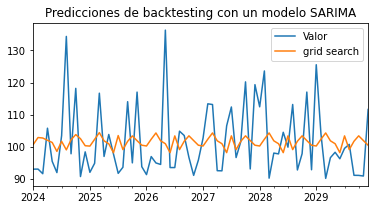

In [170]:
# División en train y test:
df14 = df_csv('Datos/Distribuciones','Chi_cuadrado-fin')
df14_train = df14[:288]
df14_test = df14[288:]
df14.index.freq='ME'

prediccion_autorregresivos(df14,df14_train,df14_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
1.075015685540195


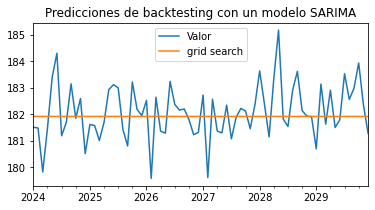

In [172]:
# División en train y test:
df15 = df_csv('Datos/Distribuciones','T_Student-periodos')
df15_train = df15[:288]
df15_test = df15[288:]
df15.index.freq='ME'

prediccion_autorregresivos(df15,df15_train,df15_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
234.63105403043585


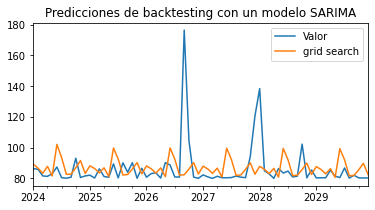

In [173]:
# División en train y test:
df16 = df_csv('Datos/Distribuciones','Lognormal-fin')
df16_train = df16[:288]
df16_test = df16[288:]
df16.index.freq='ME'

prediccion_autorregresivos(df16,df16_train,df16_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
8.669737113274316


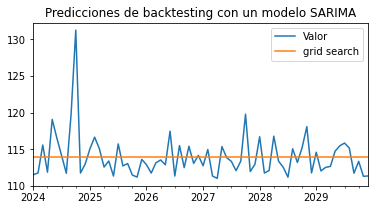

In [11]:
# División en train y test:
df17 = df_csv('Datos/Distribuciones','Pareto-periodos')
df17_train = df17[:288]
df17_test = df17[288:]
df17.index.freq='ME'

prediccion_autorregresivos(df17,df17_train,df17_test,columna)

In [ ]:
# División en train y test:
df18 = df_csv('Datos/Distribuciones','Lineal-asc-fin')
df18_train = df18[:288]
df18_test = df18[288:]
df18.index.freq='ME'


prediccion_autorregresivos(df18,df18_train,df18_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

In [6]:
## División en train y test:
df19 = df_csv('Datos/Distribuciones','Lineal-desc-periodos')
df19_train = df19[:288]
df19_test = df19[288:]
df19.index.freq='ME'

prediccion_autorregresivos(df19,df19_train,df19_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

LinAlgError: LU decomposition error.

In [5]:
## División en train y test:
df20 = df_csv('Datos/Distribuciones','Aleatorio-fin')
df20_train = df20[:288]
df20_test = df20[288:]
df20.index.freq='ME'

prediccion_autorregresivos(df20,df20_train,df20_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

LinAlgError: LU decomposition error.

MODELOS PERIÓDICOS:

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
0.0


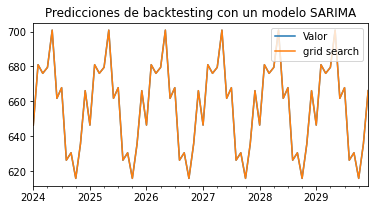

In [11]:
# División en train y test:
df21 = df_csv('Datos/Periodicas','Amplitud-fin')
df21_train = df21[:288]
df21_test = df21[288:]
df21.index.freq='ME'

prediccion_autorregresivos(df21,df21_train,df21_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
0.0


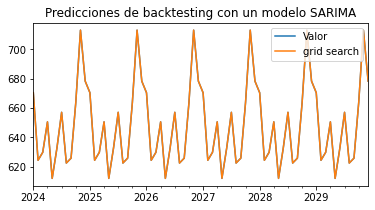

In [6]:
# División en train y test:
df22 = df_csv('Datos/Periodicas','Amplitud-periodos')
df22_train = df22[:288]
df22_test = df22[288:]
df22.index.freq='ME'

prediccion_autorregresivos(df22,df22_train,df22_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
504.0829301021323


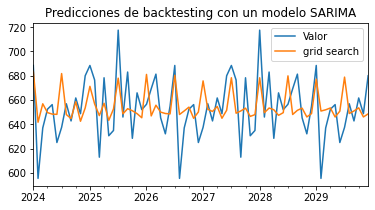

In [9]:
# División en train y test:
df23 = df_csv('Datos/Periodicas','Cantidad-fin')
df23_train = df23[:288]
df23_test = df23[288:]
df23.index.freq='ME'

prediccion_autorregresivos(df23,df23_train,df23_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
433.03219299591706


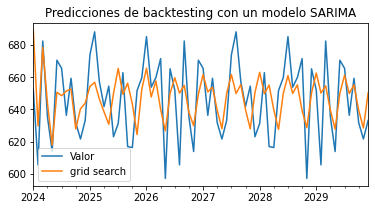

In [10]:
# División en train y test:
df24 = df_csv('Datos/Periodicas','Cantidad-periodos')
df24_train = df24[:288]
df24_test = df24[288:]
df24.index.freq='ME'

prediccion_autorregresivos(df24,df24_train,df24_test,columna)

MODELOS AUTORREGRESIVOS:

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
1.4084925319372203


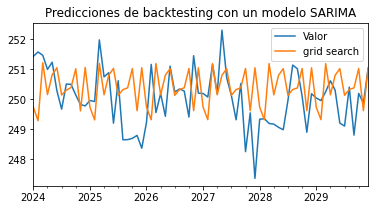

In [12]:
# División en train y test:
df25 = df_csv('Datos/ARMA','AR-fin')
df25_train = df25[:288]
df25_test = df25[288:]
df25.index.freq='ME'

prediccion_autorregresivos(df25,df25_train,df25_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
1.9184268513700589


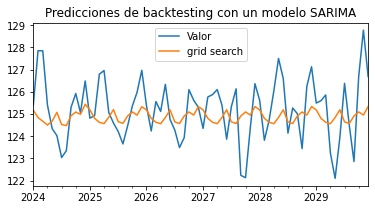

In [13]:
# División en train y test:
df26 = df_csv('Datos/ARMA','MA-periodos')
df26_train = df26[:288]
df26_test = df26[288:]
df26.index.freq='ME'

prediccion_autorregresivos(df26,df26_train,df26_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
2.426287852309005


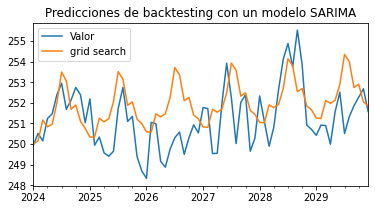

In [14]:
# División en train y test:
df27 = df_csv('Datos/ARMA','ARMA-fin')
df27_train = df27[:288]
df27_test = df27[288:]
df27.index.freq='ME'

prediccion_autorregresivos(df27,df27_train,df27_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
1.628470642253025


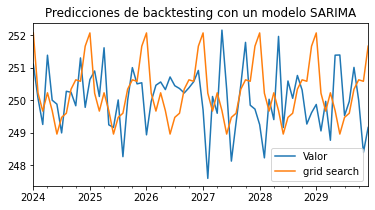

In [15]:
# División en train y test:
df28 = df_csv('Datos/ARMA','AR-estacional-periodos')
df28_train = df28[:288]
df28_test = df28[288:]
df28.index.freq='ME'

prediccion_autorregresivos(df28,df28_train,df28_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
1.581372344883401


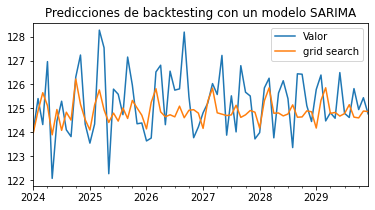

In [16]:
# División en train y test:
df29 = df_csv('Datos/ARMA','MA-estacional-fin')
df29_train = df29[:288]
df29_test = df29[288:]
df29.index.freq='ME'

prediccion_autorregresivos(df29,df29_train,df29_test,columna)

Number of models compared: 42.


params grid:   0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metrica (mean absolute error): 
6.156084358553737


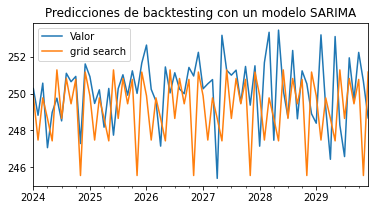

In [17]:
# División en train y test:
df30 = df_csv('Datos/ARMA','ARMA-estacional-periodos')
df30_train = df30[:288]
df30_test = df30[288:]
df30.index.freq='ME'

prediccion_autorregresivos(df30,df30_train,df30_test,columna)